In [48]:
install.packages("imputeTS")

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘tseries’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘RcppArmadillo’, ‘stinepack’, ‘forecast’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [51]:
library(imputeTS)

In [10]:
mydata = read.csv("ts_corn_df.csv")

In [36]:
dataframe <- data.frame(mydata, row.names="fips_code")

In [37]:
names(dataframe)

[1] "X1970" "X1971" "X1972" "X1973" "X1974" "X1975" "X1976" "X1977" "X1978"
[10] "X1979" "X1980" "X1981" "X1982" "X1983" "X1984" "X1985" "X1986" "X1987"
[19] "X1988" "X1989" "X1990" "X1991" "X1992" "X1993" "X1994" "X1995" "X1996"
[28] "X1997" "X1998" "X1999" "X2000" "X2001" "X2002" "X2003" "X2004" "X2005"
[37] "X2006" "X2007" "X2008" "X2009" "X2010" "X2011" "X2012" "X2013" "X2014"
[46] "X2015" "X2016"

In [41]:
head(dataframe)

,X1970,X1971,X1972,X1973,X1974,X1975,X1976,X1977,X1978,X1979,⋯,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016
1001,23,41,52.5,48.3,42,59,45,15,36.9,44.5,⋯,40,NA,NA,NA,111.1,NA,99.3,NA,NA,NA
1003,28,52,67.5,68.6,78,62,100,48,100.6,98.3,⋯,105,NA,124,161.9,65.9,123.3,156.0,138.9,147.2,152.9
1005,27,43,49.4,41.2,30,50,53,20,39.3,45.0,⋯,103,NA,109,79.4,119.6,NA,153.8,166.3,181.6,188.9
1007,26,44,36.1,43.2,35,35,44,20,35.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1009,29,47,49.3,47.7,42,42,53,28,48.4,54.5,⋯,NA,NA,110,NA,109.5,70.0,137.1,144.0,128.4,NA
1011,23,39,39.2,39.7,37,37,51,30,36.0,36.9,⋯,NA,NA,NA,NA,NA,142.0,128.0,NA,NA,NA


In [68]:
colSums(is.na(dataframe))

X1970 X1971 X1972 X1973 X1974 X1975 X1976 X1977 X1978 X1979 X1980 X1981 X1982 
  377   373   315   294   246   266   254   248   325   349   369   379   386 
X1983 X1984 X1985 X1986 X1987 X1988 X1989 X1990 X1991 X1992 X1993 X1994 X1995 
  426   426   437   472   488   523   533   598   569   538   623   619   701 
X1996 X1997 X1998 X1999 X2000 X2001 X2002 X2003 X2004 X2005 X2006 X2007 X2008 
  657   691   676   701   721   777   714   743   786   797   847   872  1183 
X2009 X2010 X2011 X2012 X2013 X2014 X2015 X2016 
 1215  1050  1135  1082  1222  1206  1335  1261

In [118]:
mat <- rowSums(is.na(dataframe))
mat

1001  1003  1005  1007  1009  1011  1013  1015  1017  1019  1021  1023  1025 
    7     2     3    35     6    18    10     7    36     1    24    22    22 
 1027  1029  1031  1033  1035  1037  1039  1041  1043  1045  1047  1049  1051 
   30    23     4     1     3    37     6    12     1     2     4     0     3 
 1053  1055  1057  1059  1061  1063  1065  1067  1069  1071  1073  1075  1077 
    2     4     2    14     7    14    10     4     4     1    34     8     0 
 1079  1081  1083  1085  1087  1089  1091  1093  1095  1097  1099  1101  1103 
    0    23     0    15    14     0    12    12     3    13     4    15     3 
 1105  1107  1109  1111  1113  1115  1117  1119  1121  1123  1125  1127  1129 
   11    14     1     8    12    32    18    11     3    29     1    26     5 
 1131  1133  4001  4003  4005  4007  4009  4011  4012  4013  4015  4017  4019 
   12    22    35     9    31    43    12    34    36    13    45    35    41 
 4021  4023  4025  4027  5001  5003  5005  5007  5009  5011  5013  5015  5017 
   18    40    29    23    12    13    38    24    35    37    30    39     3 
 5019  5021  5023  5025  5027  5029  5031  5033  5035  5037  5039  5041  5043 
   24     0    31    37    37     6     0    22     8    15    38     4    17 
 5045  5047  5049  5051  5053  5055  5057  5059  5061  5063  5065  5067  5069 
   25    36    39    39    39     0    29    34    36    12    37     0     4 
 5071  5073  5075  5077  5079  5081  5083  5085  5087  5089  5091  5093  5095 
   28     9    20     9    14    19    22     9    34    36    10     1     9 
 5097  5099  5101  5103  5105  5107  5109  5111  5113  5115  5117  5119  5121 
   37    29    39    31    35     8    39     5    39    23     5    29     3 
 5123  5125  5127  5129  5131  5133  5135  5137  5139  5141  5143  5145  5147 
   14    38    36    38    37    39    39    39    39    38    34     9     2 
 5149  6001  6005  6007  6009  6011  6013  6017  6019  6021  6023  6025  6029 
   15    33    21     9    46     5    10    46     6     1    40    20     6 
 6031  6033  6035  6037  6039  6045  6047  6049  6053  6059  6061  6065  6067 
    5    39    38    46     9    38     4    45    23    46    26    14     0 
 6069  6071  6073  6077  6079  6081  6083  6085  6089  6093  6095  6097  6099 
   38    31    43     1    33    45    38    39    42    42     0    33     6 
 6101  6103  6107  6111  6113  6115  8001  8003  8005  8007  8009  8011  8013 
    2     9     6    45     1    10     1    44    19    44     5     4     6 
 8015  8017  8021  8023  8025  8027  8029  8033  8035  8037  8039  8041  8043 
   46     1    42    44    12    46     7    35    39    45    21    23    34 
 8045  8051  8055  8059  8061  8063  8067  8069  8071  8073  8075  8077  8081 
   28    38    34    39     6     1    26     2    14     5     1     8    41 
 8083  8085  8087  8089  8095  8097  8099  8101  8103  8105  8107  8109  8113 
   26     8     3     3     1    46     5     5    39    43    43    41    46 
 8115  8119  8121  8123  8125 10001 10003 10005 12001 12003 12005 12007 12013 
    2    46     4     0     0     0     0     0    11    32    35    31    19 
12023 12029 12031 12033 12035 12039 12041 12047 12059 12063 12065 12067 12069 
   10    29    32     7    40     7    11     9     7     7     9    21    33 
12073 12075 12077 12079 12081 12083 12089 12091 12095 12107 12109 12113 12119 
   14    11    35     8    45    25    31     7    39    25    26    11    39 
12121 12123 12125 12127 12129 12131 12133 13001 13003 13005 13007 13009 13011 
    8    31    24    39    35     7     7     2     2     6     0    24    24 
13013 13015 13017 13019 13021 13023 13025 13027 13029 13031 13033 13035 13037 
   26     4     4     4    24     4     4     4     9     5     0    24     0 
13039 13043 13045 13047 13049 13051 13053 13055 13057 13059 13061 13063 13065 
   29     7    22    16    22    25    41     2    27    32     8    28    12 
13067 13069 13071 13073 13075 13077 13079 13081 130

In [121]:
m2 <- matrix(mat)
m2

7
2
3
35
6
18
10
7
36
1
24


In [117]:
str(rowSums(is.na(dataframe)))

 Named num [1:2768] 7 2 3 35 6 18 10 7 36 1 ...
 - attr(*, "names")= chr [1:2768] "1001" "1003" "1005" "1007" ...


In [115]:
dataframe[rowSums(is.na(dataframe)) <17]

ERROR: Error in `[.data.frame`(dataframe, rowSums(is.na(dataframe)) < 17): undefined columns selected


In [71]:
missing_years = rowSums(is.na(dataframe))

In [102]:
names(missing_years)

[1] "1001"  "1003"  "1005"  "1007"  "1009"  "1011"  "1013"  "1015"  "1017" 
  [10] "1019"  "1021"  "1023"  "1025"  "1027"  "1029"  "1031"  "1033"  "1035" 
  [19] "1037"  "1039"  "1041"  "1043"  "1045"  "1047"  "1049"  "1051"  "1053" 
  [28] "1055"  "1057"  "1059"  "1061"  "1063"  "1065"  "1067"  "1069"  "1071" 
  [37] "1073"  "1075"  "1077"  "1079"  "1081"  "1083"  "1085"  "1087"  "1089" 
  [46] "1091"  "1093"  "1095"  "1097"  "1099"  "1101"  "1103"  "1105"  "1107" 
  [55] "1109"  "1111"  "1113"  "1115"  "1117"  "1119"  "1121"  "1123"  "1125" 
  [64] "1127"  "1129"  "1131"  "1133"  "4001"  "4003"  "4005"  "4007"  "4009" 
  [73] "4011"  "4012"  "4013"  "4015"  "4017"  "4019"  "4021"  "4023"  "4025" 
  [82] "4027"  "5001"  "5003"  "5005"  "5007"  "5009"  "5011"  "5013"  "5015" 
  [91] "5017"  "5019"  "5021"  "5023"  "5025"  "5027"  "5029"  "5031"  "5033" 
 [100] "5035"  "5037"  "5039"  "5041"  "5043"  "5045"  "5047"  "5049"  "5051" 
 [109] "5053"  "5055"  "5057"  "5059"  "5061"  "5063"  "5065"  "5067"  "5069" 
 [118] "5071"  "5073"  "5075"  "5077"  "5079"  "5081"  "5083"  "5085"  "5087" 
 [127] "5089"  "5091"  "5093"  "5095"  "5097"  "5099"  "5101"  "5103"  "5105" 
 [136] "5107"  "5109"  "5111"  "5113"  "5115"  "5117"  "5119"  "5121"  "5123" 
 [145] "5125"  "5127"  "5129"  "5131"  "5133"  "5135"  "5137"  "5139"  "5141" 
 [154] "5143"  "5145"  "5147"  "5149"  "6001"  "6005"  "6007"  "6009"  "6011" 
 [163] "6013"  "6017"  "6019"  "6021"  "6023"  "6025"  "6029"  "6031"  "6033" 
 [172] "6035"  "6037"  "6039"  "6045"  "6047"  "6049"  "6053"  "6059"  "6061" 
 [181] "6065"  "6067"  "6069"  "6071"  "6073"  "6077"  "6079"  "6081"  "6083" 
 [190] "6085"  "6089"  "6093"  "6095"  "6097"  "6099"  "6101"  "6103"  "6107" 
 [199] "6111"  "6113"  "6115"  "8001"  "8003"  "8005"  "8007"  "8009"  "8011" 
 [208] "8013"  "8015"  "8017"  "8021"  "8023"  "8025"  "8027"  "8029"  "8033" 
 [217] "8035"  "8037"  "8039"  "8041"  "8043"  "8045"  "8051"  "8055"  "8059" 
 [226] "8061"  "8063"  "8067"  "8069"  "8071"  "8073"  "8075"  "8077"  "8081" 
 [235] "8083"  "8085"  "8087"  "8089"  "8095"  "8097"  "8099"  "8101"  "8103" 
 [244] "8105"  "8107"  "8109"  "8113"  "8115"  "8119"  "8121"  "8123"  "8125" 
 [253] "10001" "10003" "10005" "12001" "12003" "12005" "12007" "12013" "12023"
 [262] "12029" "12031" "12033" "12035" "12039" "12041" "12047" "12059" "12063"
 [271] "12065" "12067" "12069" "12073" "12075" "12077" "12079" "12081" "12083"
 [280] "12089" "12091" "12095" "12107" "12109" "12113" "12119" "12121" "12123"
 [289] "12125" "12127" "12129" "12131" "12133" "13001" "13003" "13005" "13007"
 [298] "13009" "13011" "13013" "13015" "13017" "13019" "13021" "13023" "13025"
 [307] "13027" "13029" "13031" "13033" "13035" "13037" "13039" "13043" "13045"
 [316] "13047" "13049" "13051" "13053" "13055" "13057" "13059" "13061" "13063"
 [325] "13065" "13067" "13069" "13071" "13073" "13075" "13077" "13079" "13081"
 [334] "13083" "13085" "13087" "13089" "13091" "13093" "13095" "13097" "13099"
 [343] "13101" "13103" "13105" "13107" "13109" "13111" "13113" "13115" "13117"
 [352] "13119" "13121" "13123" "13125" "13127" "13129" "13131" "13133" "13135"
 [361] "13137" "13139" "13141" "13143" "13145" "13147" "13149" "13151" "13153"
 [370] "13155" "13157" "13159" "13161" "13163" "13165" "13167" "13169" "13171"
 [379] "13173" "13175" "13177" "13179" "13181" "13183" "13185" "13187" "13189"
 [388] "13191" "13193" "13195" "13197" "13199" "13201" "13205" "13207" "13209"
 [397] "13211" "13213" "13215" "13217" "13219" "13221" "13223" "13225" "13227"
 [406] "13229" "13231" "13233" "13235" "13237" "13239" "13241" "13243" "13245"
 [415] "13247" "13249" "13251" "13253" "13255" "13257" "13259" "13261" "13263"
 [424] "13265" "13267" "13269" "13271" "13273" "13275" "13277" "13279" "13281"
 [433] "13283" "13285" "13287" "13289" "13291" "13293" "13295" "13297" "13299"
 [442] "13301" "13303" "13305" "13307" "13309" "13311" "13313" "13315" "13317"
 [451] "13319" "13321" "16001" "16011" "16019" "16027

In [103]:
greater_30 <- missing_years[missing_years <= 17]
greater_30

1001  1003  1005  1009  1013  1015  1019  1031  1033  1035  1039  1041  1043 
    7     2     3     6    10     7     1     4     1     3     6    12     1 
 1045  1047  1049  1051  1053  1055  1057  1059  1061  1063  1065  1067  1069 
    2     4     0     3     2     4     2    14     7    14    10     4     4 
 1071  1075  1077  1079  1083  1085  1087  1089  1091  1093  1095  1097  1099 
    1     8     0     0     0    15    14     0    12    12     3    13     4 
 1101  1103  1105  1107  1109  1111  1113  1119  1121  1125  1129  1131  4003 
   15     3    11    14     1     8    12    11     3     1     5    12     9 
 4009  4013  5001  5003  5017  5021  5029  5031  5035  5037  5041  5043  5055 
   12    13    12    13     3     0     6     0     8    15     4    17     0 
 5063  5067  5069  5073  5077  5079  5085  5091  5093  5095  5107  5111  5117 
   12     0     4     9     9    14     9    10     1     9     8     5     5 
 5121  5123  5145  5147  5149  6007  6011  6013  6019  6021  6029  6031  6039 
    3    14     9     2    15     9     5    10     6     1     6     5     9 
 6047  6065  6067  6077  6095  6099  6101  6103  6107  6113  6115  8001  8009 
    4    14     0     1     0     6     2     9     6     1    10     1     5 
 8011  8013  8017  8025  8029  8061  8063  8069  8071  8073  8075  8077  8085 
    4     6     1    12     7     6     1     2    14     5     1     8     8 
 8087  8089  8095  8099  8101  8115  8121  8123  8125 10001 10003 10005 12001 
    3     3     1     5     5     2     4     0     0     0     0     0    11 
12023 12033 12039 12041 12047 12059 12063 12065 12073 12075 12079 12091 12113 
   10     7     7    11     9     7     7     9    14    11     8     7    11 
12121 12131 12133 13001 13003 13005 13007 13015 13017 13019 13023 13025 13027 
    8     7     7     2     2     6     0     4     4     4     4     4     4 
13029 13031 13033 13037 13043 13047 13055 13061 13065 13069 13071 13075 13081 
    9     5     0     0     7    16     2     8    12     0     2     1     5 
13085 13087 13091 13093 13095 13099 13101 13103 13107 13109 13115 13123 13129 
   16     1     2     5     7     4    12     4     1     4     2    16     2 
13131 13139 13147 13153 13155 13161 13163 13165 13167 13171 13173 13175 13177 
    1     8     4     7     1     3     1     2     4    16     4     4     9 
13183 13185 13189 13193 13197 13201 13205 13209 13213 13225 13229 13233 13235 
   10     4    16     1     1     1     2     8    11    10     3     6     6 
13243 13245 13249 13251 13253 13259 13261 13267 13269 13271 13273 13275 13277 
    4    17    11     0     0    10     3     1     8     8     2     3     3 
13279 13283 13287 13289 13291 13295 13299 13303 13305 13307 13309 13311 13313 
    2    15     2    14    10     8     1     3     4     9    10     4    13 
13315 13321 16001 16027 16031 16039 16041 16045 16047 16053 16063 16073 16075 
    3     0     9     8    15    11    16     9    10     9    11     8     8 
16083 16087 17001 17003 17005 17007 17009 17011 17013 17015 17017 17019 17021 
   11    13     0     3     2     1     0     0     2     0     0     0     0 
17023 17025 17027 17029 17031 17033 17035 17037 17039 17041 17043 17045 17047 
    2     1     0     1     6     1     0     0     1     0     8     0     2 
17049 17051 17053 17055 17057 17059 17061 17063 17065 17067 17069 17071 17073 
    0     0     0     0     0     0     0     0     2     0     8     0     0 
17075 17077 17079 17081 17083 17085 17087 17089 17091 17093 17095 17097 17099 
    0     1     0     1     0     0     2     0     0     2     0     3     0 
17101 17103 17105 17107 17109 17111 17113 17115 17117 17119 17121 17123 17125 
    3     0     0     0     0     0     0     0     0     0     0     0     0 
17127 17129 17131 17133 17135 17137 17139 17141 17143 17145 17147 17149 17151 
    1     1     0     0     0     0     0     0     0     0     0     0     5 
17153 17155 17157 17159 17161 17163 17165 17167 171

In [108]:
t(dataframe)[names(greater_30) ]

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA N

In [111]:
names((dataframe))

[1] "X1970" "X1971" "X1972" "X1973" "X1974" "X1975" "X1976" "X1977" "X1978"
[10] "X1979" "X1980" "X1981" "X1982" "X1983" "X1984" "X1985" "X1986" "X1987"
[19] "X1988" "X1989" "X1990" "X1991" "X1992" "X1993" "X1994" "X1995" "X1996"
[28] "X1997" "X1998" "X1999" "X2000" "X2001" "X2002" "X2003" "X2004" "X2005"
[37] "X2006" "X2007" "X2008" "X2009" "X2010" "X2011" "X2012" "X2013" "X2014"
[46] "X2015" "X2016"

In [98]:
rowSums(is.na(greater3))

X1976     X1971     X1972     X1975     X1979   X1976.1     X1970     X1973 
      254       373       315       266       349       254       377       294 
  X1970.1   X1972.1   X1975.1     X1981   X1970.2   X1971.1   X1973.1   X1972.2 
      377       315       266       379       377       373       294       315 
  X1971.2   X1973.2   X1971.3     X1983   X1976.2   X1983.1   X1979.1   X1973.3 
      373       294       373       426       254       426       349       294 
  X1973.4   X1970.3     X1977     X1984   X1983.2   X1981.1   X1981.2   X1972.3 
      294       377       248       426       426       379       379       315 
    X1982   X1973.5   X1984.1   X1972.4     X1980   X1983.3   X1970.4   X1977.1 
      386       294       426       315       369       426       377       248 
  X1981.3   X1980.1   X1972.5   X1970.5     X1974   X1981.4     X1978   X1981.5 
      379       369       315       377       246       379       325       379 
  X1982.1   X1981.6   X1982.2   X1972.6   X1975.2   X1977.2   X1984.2   X1973.6 
      386       379       386       315       266       248       426       294 
    X1986   X1981.7   X1973.7   X1978.1   X1978.2   X1983.4   X1978.3   X1979.2 
      472       379       294       325       325       426       325       349 
  X1970.6   X1978.4   X1977.3   X1974.1   X1974.2   X1972.7   X1983.5   X1978.5 
      377       325       248       246       246       315       426       325 
  X1971.4   X1984.3   X1978.6   X1974.3   X1979.3   X1975.3   X1970.7   X1975.4 
      373       426       325       246       349       266       377       266 
  X1974.4   X1978.7   X1973.8   X1983.6   X1970.8   X1975.5   X1971.5   X1978.8 
      246       325       294       426       377       266       373       325 
  X1975.6   X1970.9   X1979.4  X1970.10   X1974.5   X1973.9   X1975.7  X1970.11 
      266       377       349       377       246       294       266       377 
  X1981.8   X1976.3   X1975.8  X1970.12   X1971.6   X1983.7   X1974.6  X1970.13 
      379       254       266       377       373       426       246       377 
  X1977.4   X1977.5   X1972.8   X1972.9  X1970.14   X1974.7   X1974.8   X1971.7 
      248       248       315       315       377       246       246       373 
 X1973.10   X1980.2   X1979.5   X1976.4   X1976.5   X1980.3   X1978.9   X1976.6 
      294       369       349       254       254       369       325       254 
  X1976.7  X1978.10   X1983.8   X1980.4   X1977.6   X1976.8   X1980.5   X1977.7 
      254       325       426       369       248       254       369       248 
  X1976.9  X1976.10   X1971.8   X1971.9   X1975.9  X1973.11  X1973.12  X1973.13 
      254       254       373       373       266       294       294       294 
 X1973.14  X1973.15  X1973.16  X1978.11   X1974.9  X1976.11     X1985  X1971.10 
      294       294       294       325       246       254       437       373 
  X1977.8   X1981.9  X1971.11  X1970.15  X1974.10   X1985.1  X1970.16  X1971.12 
      248       379       373       377       246       437       377       373 
 X1974.11  X1976.12  X1973.17  X1981.10  X1973.18  X1970.17  X1973.19  X1971.13 
      246       254       294       379       294       377       294       373 
  X1985.2  X1971.14  X1970.18   X1977.9  X1973.20  X1976.13  X1970.19  X1972.10 
      437       373       377       248       294       254       377       315 
 X1970.20  X1971.15  X1973.21   X1985.3  X1973.22  X1973.23  X1978.12   X1979.6 
      377       373       294       437       294       294       325       349 
 X1973.24   X1985.4  X1970.21  X1970.22  X1970.23  X1971.16  X1977.10   X1980.6 
      294       437       377       377       377       373       248       369 
  X1979.7  X1972.11  X1975.10  X1975.11  X1973.25   X1986.1   X1980.7   X1979.8 
      349       315       266       266       294       472       369       349 
 X1972.12  X1970.24  X1977.11  X1977.12  X1971.17  X1972.13  X1972.14  X1971.18 
      315       377       248      

In [95]:
str(dataframe)

'data.frame':	2768 obs. of  47 variables:
 $ X1970: num  23 28 27 26 29 23 21 26 22 30 ...
 $ X1971: num  41 52 43 44 47 39 36 51 38 52 ...
 $ X1972: num  52.5 67.5 49.4 36.1 49.3 39.2 41.5 52 45.6 55.5 ...
 $ X1973: num  48.3 68.6 41.2 43.2 47.7 39.7 38.1 50.9 50.7 53.7 ...
 $ X1974: num  42 78 30 35 42 37 36 41 36 42 ...
 $ X1975: num  59 62 50 35 42 37 38 43 43 55 ...
 $ X1976: num  45 100 53 44 53 51 37 50 35 63 ...
 $ X1977: num  15 48 20 20 28 30 22 30 20 25 ...
 $ X1978: num  36.9 100.6 39.3 35 48.4 ...
 $ X1979: num  44.5 98.3 45 NA 54.5 36.9 48.9 67.7 51.8 74.4 ...
 $ X1980: num  20.8 80.1 39.5 NA 14.7 22 29 14.7 NA 16.6 ...
 $ X1981: num  17.3 101.4 37.9 NA 53.8 ...
 $ X1982: num  59.1 94.5 65 NA 68.9 47.8 56.6 46.7 NA 50 ...
 $ X1983: num  38 95.2 56.8 21.7 35.7 67.5 44.2 25.6 NA 40.8 ...
 $ X1984: num  41.2 78.5 56.4 NA 56.4 54 53.8 64.1 NA 64.4 ...
 $ X1985: num  56.5 80 63 58.6 91.7 66.7 51.8 75.8 NA 92.7 ...
 $ X1986: num  38.5 76.5 38.2 45 66.7 39 73.3 59.4 NA 47.7 ...


In [60]:
# Create a short example time series with missing values
x <- ts(dataframe)

In [63]:
head(na.interpolation(x))

X1970,X1971,X1972,X1973,X1974,X1975,X1976,X1977,X1978,X1979,⋯,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016
23,41,52.5,48.3,42,59,45,15,36.9,44.50,⋯,40.0,71,124.0000,161.90,111.1000,123.30000,99.30,138.90,147.20,152.9
28,52,67.5,68.6,78,62,100,48,100.6,98.30,⋯,105.0,71,124.0000,161.90,65.9000,123.30000,156.00,138.90,147.20,152.9
27,43,49.4,41.2,30,50,53,20,39.3,45.00,⋯,103.0,71,109.0000,79.40,119.6000,105.53333,153.80,166.30,181.60,188.9
26,44,36.1,43.2,35,35,44,20,35.0,49.75,⋯,100.4,71,109.5000,74.85,114.5500,87.76667,145.45,155.15,155.00,175.1
29,47,49.3,47.7,42,42,53,28,48.4,54.50,⋯,97.8,71,110.0000,70.30,109.5000,70.00000,137.10,144.00,128.40,161.3
23,39,39.2,39.7,37,37,51,30,36.0,36.90,⋯,95.2,71,107.6667,65.75,112.8667,142.00000,128.00,123.40,122.32,147.5


In [66]:
xT <- ts(t(dataframe))

head(xT)

1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,⋯,56019,56021,56025,56027,56029,56031,56033,56041,56043,56045
23.0,28.0,27.0,26.0,29.0,23.0,21.0,26.0,22.0,30.0,⋯,NA,63.0,60,NA,64.0,64.0,NA,NA,70,NA
41.0,52.0,43.0,44.0,47.0,39.0,36.0,51.0,38.0,52.0,⋯,NA,68.0,73,NA,71.0,81.0,NA,NA,81,52
52.5,67.5,49.4,36.1,49.3,39.2,41.5,52.0,45.6,55.5,⋯,NA,60.3,70,NA,72.2,94.0,59,NA,76,57
48.3,68.6,41.2,43.2,47.7,39.7,38.1,50.9,50.7,53.7,⋯,NA,85.7,73,NA,82.0,112.4,NA,77,72,57
42.0,78.0,30.0,35.0,42.0,37.0,36.0,41.0,36.0,42.0,⋯,NA,87.0,45,NA,64.0,74.7,NA,30,67,30
59.0,62.0,50.0,35.0,42.0,37.0,38.0,43.0,43.0,55.0,⋯,NA,55.7,55,NA,73.0,96.0,NA,35,64,35


In [67]:
head(na.interpolation(xT))

Warning message:
“imputeTS: No imputation performed for column 161 because of this Error in na.interpolation(data[, i], option): Input data needs at least 2 non-NA data point for applying na.interpolation
”Warning message:
“imputeTS: No imputation performed for column 164 because of this Error in na.interpolation(data[, i], option): Input data needs at least 2 non-NA data point for applying na.interpolation
”Warning message:
“imputeTS: No imputation performed for column 173 because of this Error in na.interpolation(data[, i], option): Input data needs at least 2 non-NA data point for applying na.interpolation
”Warning message:
“imputeTS: No imputation performed for column 179 because of this Error in na.interpolation(data[, i], option): Input data needs at least 2 non-NA data point for applying na.interpolation
”Warning message:
“imputeTS: No imputation performed for column 209 because of this Error in na.interpolation(data[, i], option): Input data needs at least 2 non-NA data point f

1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,⋯,56019,56021,56025,56027,56029,56031,56033,56041,56043,56045
23.0,28.0,27.0,26.0,29.0,23.0,21.0,26.0,22.0,30.0,⋯,85,63.0,60,88,64.0,64.0,59.0,77,70,52
41.0,52.0,43.0,44.0,47.0,39.0,36.0,51.0,38.0,52.0,⋯,85,68.0,73,88,71.0,81.0,59.0,77,81,52
52.5,67.5,49.4,36.1,49.3,39.2,41.5,52.0,45.6,55.5,⋯,85,60.3,70,88,72.2,94.0,59.0,77,76,57
48.3,68.6,41.2,43.2,47.7,39.7,38.1,50.9,50.7,53.7,⋯,85,85.7,73,88,82.0,112.4,62.6,77,72,57
42.0,78.0,30.0,35.0,42.0,37.0,36.0,41.0,36.0,42.0,⋯,85,87.0,45,88,64.0,74.7,66.2,30,67,30
59.0,62.0,50.0,35.0,42.0,37.0,38.0,43.0,43.0,55.0,⋯,85,55.7,55,88,73.0,96.0,69.8,35,64,35


In [46]:
installed.packages()

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
assertthat,assertthat,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,0.1,NA,NA,NA,NA,testthat,NA,GPL-3,NA,NA,NA,NA,no,3.3.2
backports,backports,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,1.0.5,NA,R (>= 3.0.0),utils,NA,NA,NA,GPL-2,NA,NA,NA,NA,no,3.3.2
base,base,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,3.3.2,base,NA,NA,NA,methods,NA,Part of R 3.3.2,NA,NA,NA,NA,NA,3.3.2
base64enc,base64enc,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,0.1-3,NA,R (>= 2.9.0),NA,NA,NA,png,GPL-2 | GPL-3,NA,NA,NA,NA,yes,3.3.2
BH,BH,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,1.65.0-1,NA,NA,NA,NA,NA,NA,BSL-1.0,NA,NA,NA,NA,no,3.3.2
bindr,bindr,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,0.1,NA,NA,NA,NA,testthat,NA,MIT + file LICENSE,NA,NA,NA,NA,no,3.3.2
bindrcpp,bindrcpp,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,0.2,NA,NA,"Rcpp, bindr","Rcpp, plogr",testthat,NA,MIT + file LICENSE,NA,NA,NA,NA,yes,3.3.2
bitops,bitops,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,1.0-6,NA,NA,NA,NA,NA,NA,GPL (>= 2),NA,NA,NA,NA,yes,3.3.2
boot,boot,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,1.3-18,NA,"R (>= 3.0.0), graphics, stats",NA,NA,"MASS, survival",NA,Unlimited,NA,NA,NA,NA,no,3.3.2
broom,broom,/Users/adamszabunio/anaconda/envs/special_topics/lib/R/library,0.4.2,NA,NA,"plyr, dplyr, tidyr, psych, stringr, reshape2, nlme, methods",NA,"knitr, boot, survival, gam, glmnet, lfe, Lahman, MASS, sp, maps, maptools, multcomp, testthat, lme4, zoo, lmtest, plm, biglm, ggplot2, nnet, geepack, AUC, ergm, network, statnet.common, xergm, btergm, binGroup, Hmisc, bbmle, gamlss, rstan, rstanarm, brms, coda, gmm, Matrix, ks, purrr, orcutt, mgcv, lmodel2, poLCA, mclust, covr, lsmeans, betareg, robust, akima",NA,MIT + file LICENSE,NA,NA,NA,NA,no,3.3.2


In [47]:
## confine search to .Library for speed
str(ip <- installed.packages(.Library, priority = "high"))
ip[, c(1,3:5)]
plic <- installed.packages(.Library, priority = "high", fields = "License")
## what licenses are there:
table( plic[, "License"] )

 chr [1:17, 1:16] "base" "compiler" "datasets" "graphics" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:17] "base" "compiler" "datasets" "graphics" ...
  ..$ : chr [1:16] "Package" "LibPath" "Version" "Priority" ...


,Package,Version,Priority,Depends
base,base,3.3.2,base,NA
compiler,compiler,3.3.2,base,NA
datasets,datasets,3.3.2,base,NA
graphics,graphics,3.3.2,base,NA
grDevices,grDevices,3.3.2,base,NA
grid,grid,3.3.2,base,NA
lattice,lattice,0.20-34,recommended,R (>= 3.0.0)
Matrix,Matrix,1.2-7.1,recommended,R (>= 3.0.1)
methods,methods,3.3.2,base,NA
parallel,parallel,3.3.2,base,NA



               GPL (>= 2) GPL (>= 2) | file LICENCE               LGPL (>= 2) 
                        1                         1                         1 
          Part of R 3.3.2 
                       14 

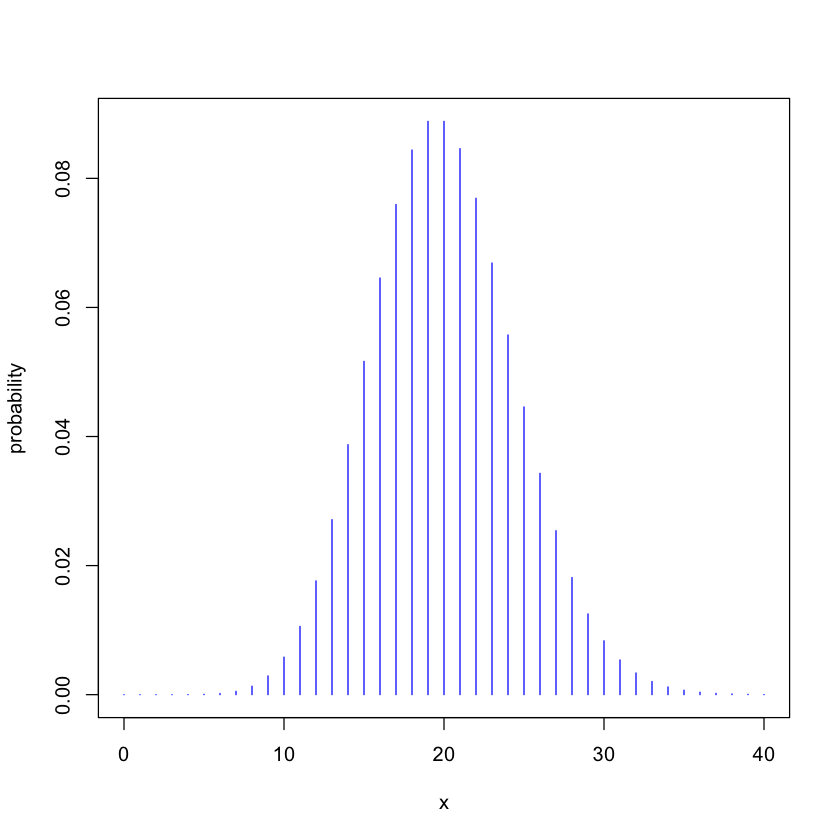

In [1]:
x<-0:40
lambda<-20
#dpois = Poisson Distribution
probability <- dpois(x,lambda)
#Histogram plot
plot(x, probability, type="h", col="blue")

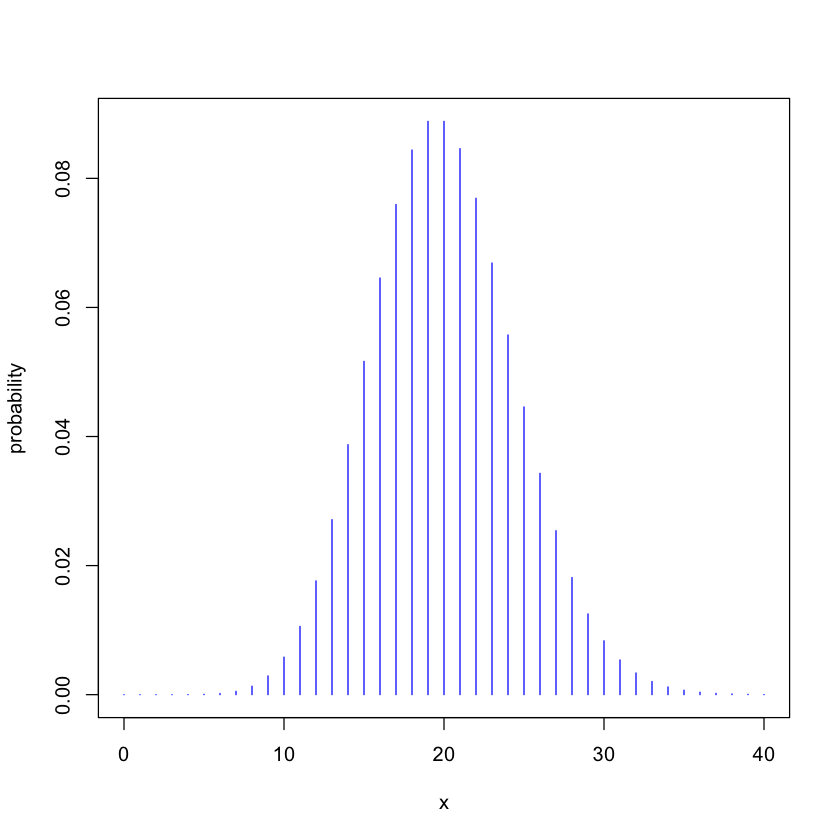

In [2]:
x=0:40
lambda=20
#dpois = Poisson Distribution
probability = dpois(x,lambda)
#Histogram plot
plot(x, probability, type="h", col="blue")

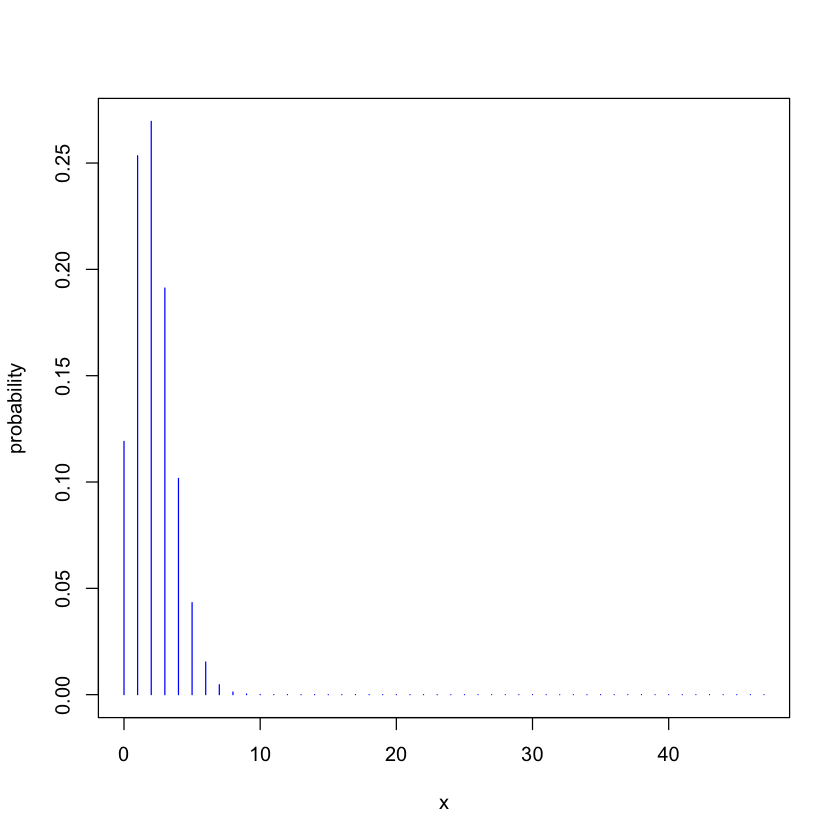

In [5]:
x=0:47
lambda=100/47
#dpois = Poisson Distribution
probability = dpois(x,lambda)
#Histogram plot
plot(x, probability, type="h", col="blue")